<a href="https://colab.research.google.com/github/menguelx7/Diplodatos/blob/main/Aprendizajesupervisado_GrupoN%C2%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from google.colab import files

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier
from pathlib import Path  




In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv")
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [ ]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [ ]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test {name}: 71.69%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decisión: 81.86%
Accuracy test Arbol de decisión: 76.23%


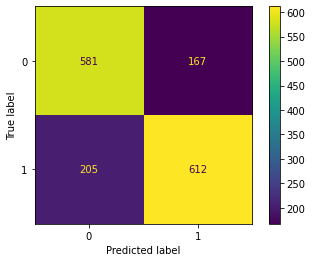

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       748
           1       0.79      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [ ]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.51
Precisión test fold 1: 77.72
Precisión test fold 2: 78.27
Precisión test fold 3: 77.38
Precisión test fold 4: 76.34
Avg. accuracy = 77.64436374223305


### Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df

Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento



In [ ]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [ ]:
test_id = PassengerId
test_pred = clf.predict(test_df)


In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

# **GRUPO 1 **

### **EDA**

En primer lugar, vamos a hacer un análisis exploratorio del conjunto de datos

In [3]:
df_train = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv")

In [4]:
df_train.shape

(7823, 14)

In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


In [6]:
df_train.isna().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

Se observa que casi todas las columnas, a excepción de PassengerId y Transported, presentan missing values.

In [7]:
((df_train.isna().sum() / len(df_train))*100).round(2)

PassengerId     0.00
HomePlanet      2.29
CryoSleep       2.51
Cabin           2.35
Destination     2.05
Age             2.07
VIP             2.35
RoomService     1.97
FoodCourt       1.98
ShoppingMall    2.40
Spa             2.02
VRDeck          2.16
Name            2.35
Transported     0.00
dtype: float64

El porcentaje de missing values para las variables mencionadas es de alrededor de un 2% para cada columna. A su vez, estos nulos se distribuyen en filas aleatorias del dataset.

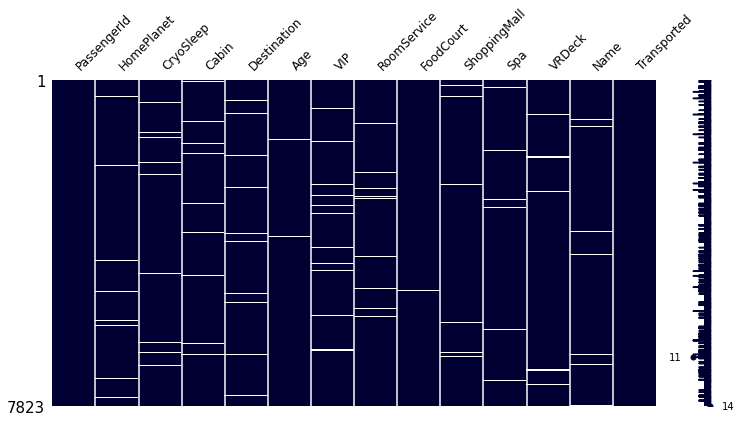

In [8]:
msno.matrix(df_train,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

In [9]:
df_train.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


Observando la tabla anterior, pordemos intuir que las variables RoomService, FoodCourt; ShoppingMall, Spa y VRDeck tienen varios outliers, ya que el máximo es exagerademente alto y se alejan de los valores más frecuentes.

In [10]:
df_train.Age.value_counts()

24.0    295
18.0    285
21.0    280
19.0    263
23.0    262
       ... 
79.0      3
72.0      3
78.0      3
77.0      2
76.0      2
Name: Age, Length: 80, dtype: int64

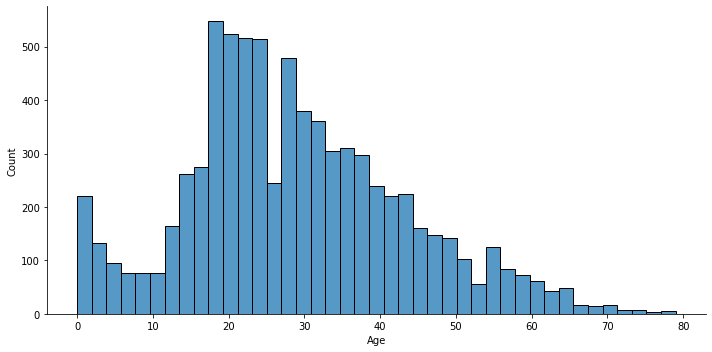

In [11]:
seaborn.displot(df_train['Age'], aspect=2) 
plt.ticklabel_format(style='plain', axis='x')

La variabe Age, por otro lado, no parece presentar outliers

A continuación, ralizamos un análisis de las variables numéricas mencionadas anteriormente (RoomService, FoodCourt; ShoppingMall, Spa y VRDeck).

In [12]:
df_train.RoomService.value_counts()

0.0       5042
1.0        107
2.0         74
3.0         55
4.0         42
          ... 
1874.0       1
1313.0       1
353.0        1
451.0        1
797.0        1
Name: RoomService, Length: 1195, dtype: int64

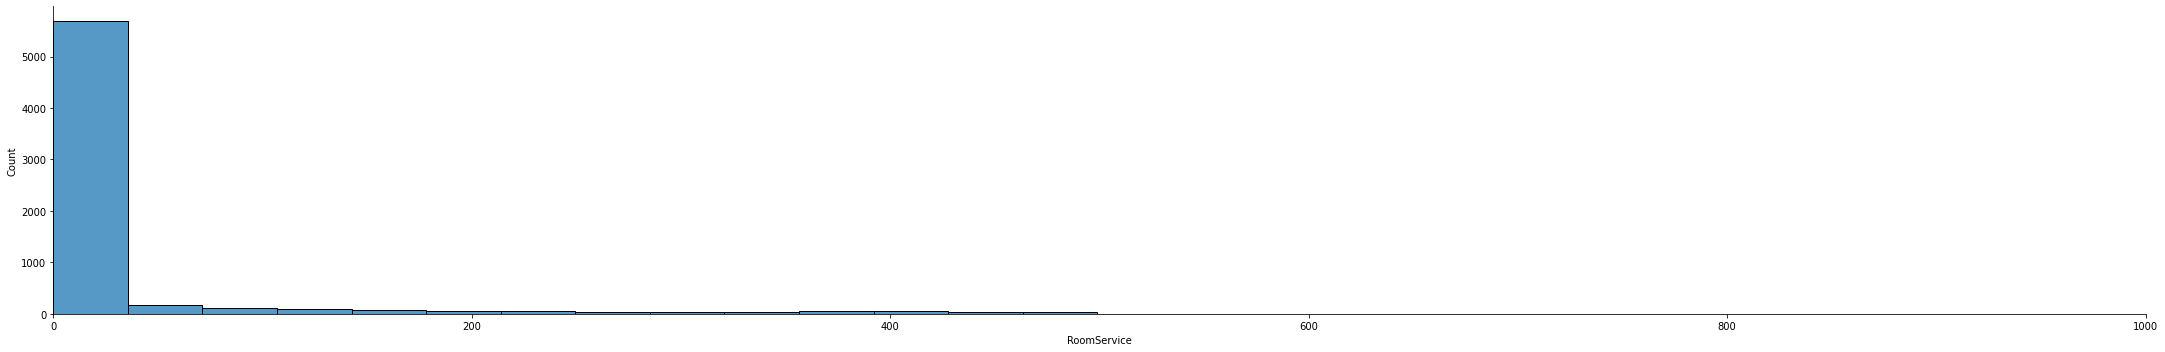

In [13]:
seaborn.displot(df_train[df_train['RoomService']<500]['RoomService'], aspect=6) 
plt.xlim(0,1000)
plt.ticklabel_format(style='plain', axis='x')

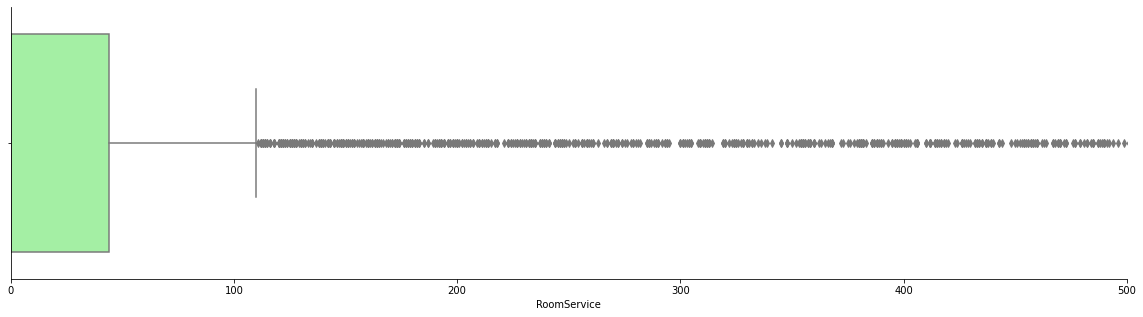

In [14]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df_train["RoomService"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,500)
seaborn.despine()

In [15]:
roomservice_count = df_train.RoomService.value_counts()\
    .reset_index().rename(columns={'index': 'quantity', 'RoomService': 'frequency'})
roomservice_count

,quantity,frequency
0,0.0,5042
1,1.0,107
2,2.0,74
3,3.0,55
4,4.0,42
...,...,...
1190,1874.0,1
1191,1313.0,1
1192,353.0,1
1193,451.0,1


In [16]:
roomservice_count = roomservice_count.sort_values(by='quantity',ascending=True)
roomservice_count

,quantity,frequency
0,0.0,5042
1,1.0,107
2,2.0,74
3,3.0,55
4,4.0,42
...,...,...
604,8209.0,1
1161,8243.0,1
994,8586.0,1
588,9920.0,1


In [17]:
#Se calculan las frecuencias relativas acumulada de la cantidad de Room service 
relative_frequency=roomservice_count[["frequency"]].cumsum()
total_frequency=roomservice_count[["frequency"]].sum()
roomservice_count["cum_frequency"]=relative_frequency/total_frequency*100

In [18]:
# calculamos la cantidad de room services que acumulan el 98% de las observaciones. Queremos dejar afuera el 2% superior de los outliers de esta columna
roomservice_count[roomservice_count['cum_frequency']<= 98]

,quantity,frequency,cum_frequency
0,0.0,5042,65.745208
1,1.0,107,67.140436
2,2.0,74,68.105359
3,3.0,55,68.822532
4,4.0,42,69.370192
...,...,...,...
1031,2206.0,1,97.926718
248,2209.0,2,97.952797
1045,2215.0,1,97.965836
1183,2223.0,1,97.978876


Repetimos el mismo procedimiento con el resto de las variables.

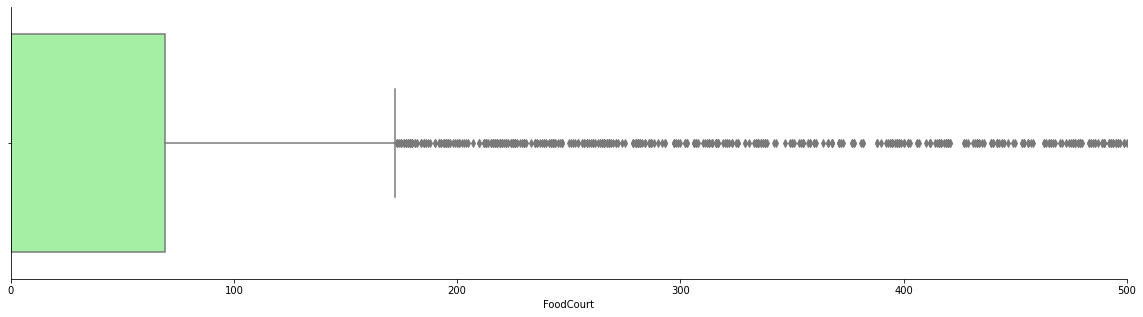

In [19]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df_train["FoodCourt"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,500)
seaborn.despine()

In [20]:
foodcourt_count = df_train.FoodCourt.value_counts().reset_index().rename(columns={'index': 'quantity', 'FoodCourt': 'frequency'})
foodcourt_count = foodcourt_count.sort_values(by='quantity',ascending=True)
relative_frequency=foodcourt_count[["frequency"]].cumsum()
total_frequency=foodcourt_count[["frequency"]].sum()
foodcourt_count["cum_frequency"]=relative_frequency/total_frequency*100
foodcourt_count[foodcourt_count['cum_frequency']<= 98]

,quantity,frequency,cum_frequency
0,0.0,4940,64.423579
1,1.0,105,65.792906
2,2.0,67,66.666667
4,3.0,47,67.279604
3,4.0,50,67.931664
...,...,...,...
976,4983.0,1,97.926448
1203,5036.0,1,97.939489
258,5063.0,2,97.965571
635,5082.0,1,97.978612


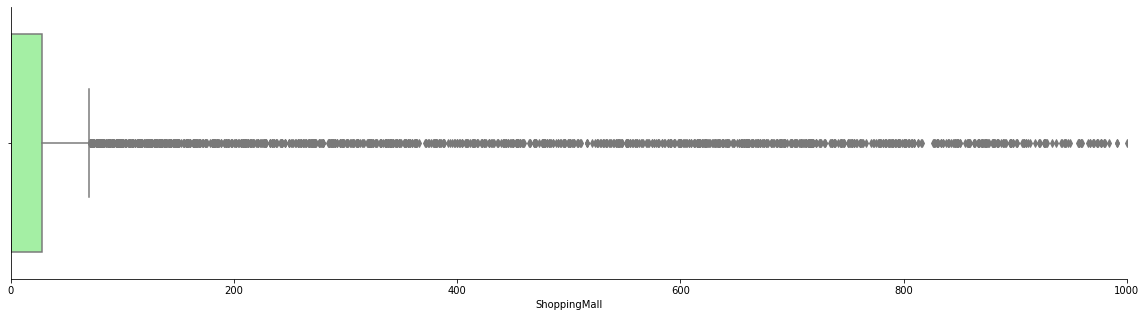

In [21]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df_train["ShoppingMall"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,1000)
seaborn.despine()

In [22]:
shoppingmall_count = df_train.ShoppingMall.value_counts().reset_index().rename(columns={'index': 'quantity', 'ShoppingMall': 'frequency'})
shoppingmall_count = shoppingmall_count.sort_values(by='quantity',ascending=True)
relative_frequency=shoppingmall_count[["frequency"]].cumsum()
total_frequency=shoppingmall_count[["frequency"]].sum()
shoppingmall_count["cum_frequency"]=relative_frequency/total_frequency*100
shoppingmall_count[shoppingmall_count['cum_frequency']<= 98]

,quantity,frequency,cum_frequency
0,0.0,5036,65.959398
1,1.0,141,67.806156
2,2.0,68,68.696791
3,3.0,55,69.417158
4,4.0,42,69.967256
...,...,...,...
870,1677.0,1,97.943680
880,1682.0,1,97.956778
721,1686.0,1,97.969876
845,1698.0,1,97.982973


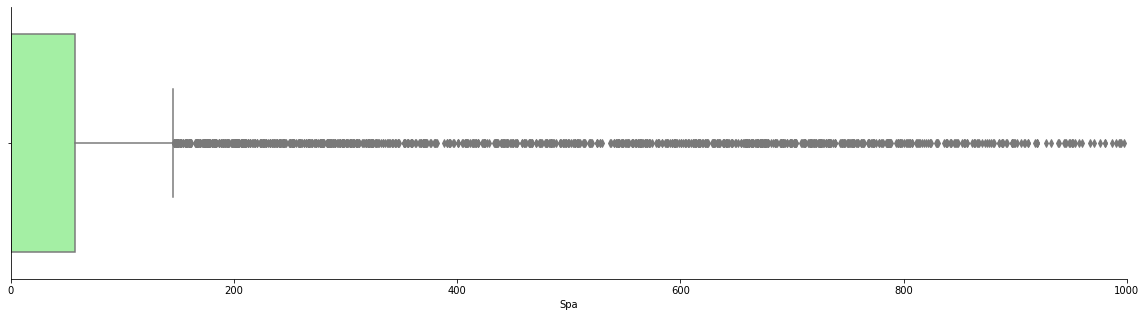

In [23]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df_train["Spa"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,1000)
seaborn.despine()

In [24]:
spa_count = df_train.Spa.value_counts().reset_index().rename(columns={'index': 'quantity', 'Spa': 'frequency'})
spa_count = spa_count.sort_values(by='quantity',ascending=True)
relative_frequency=spa_count[["frequency"]].cumsum()
total_frequency=spa_count[["frequency"]].sum()
spa_count["cum_frequency"]=relative_frequency/total_frequency*100
spa_count[spa_count['cum_frequency']<= 98]

,quantity,frequency,cum_frequency
0,0.0,4819,62.870189
1,1.0,131,64.579256
2,2.0,91,65.766471
3,3.0,51,66.431833
5,4.0,45,67.018917
...,...,...,...
833,3573.0,1,97.938682
948,3583.0,1,97.951729
549,3587.0,1,97.964775
1033,3603.0,1,97.977821


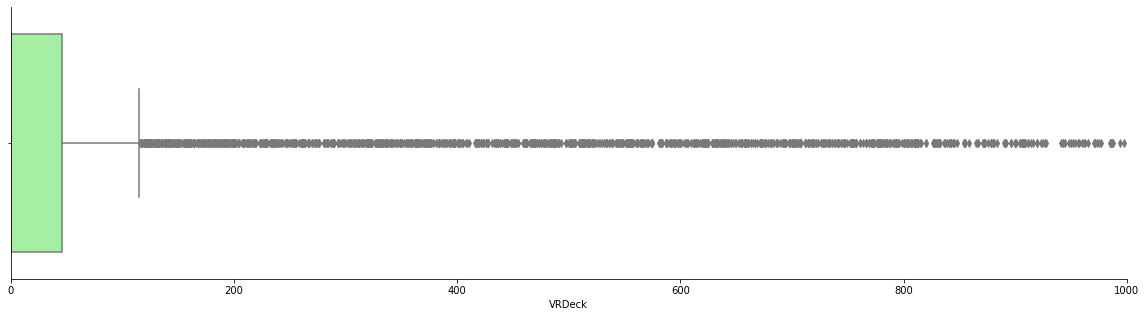

In [25]:
plt.figure(figsize=(20, 5))
seaborn.boxplot(x=df_train["VRDeck"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,1000)
seaborn.despine()

In [26]:
vrdeck_count = df_train.VRDeck.value_counts().reset_index().rename(columns={'index': 'quantity', 'VRDeck': 'frequency'})
vrdeck_count = vrdeck_count.sort_values(by='quantity',ascending=True)
relative_frequency=vrdeck_count[["frequency"]].cumsum()
total_frequency=vrdeck_count[["frequency"]].sum()
vrdeck_count["cum_frequency"]=relative_frequency/total_frequency*100
vrdeck_count[vrdeck_count['cum_frequency']<= 98]

,quantity,frequency,cum_frequency
0,0.0,4941,64.554481
1,1.0,125,66.187614
2,2.0,67,67.062974
3,3.0,53,67.755422
5,4.0,43,68.317220
...,...,...,...
600,3404.0,1,97.935720
1176,3447.0,1,97.948785
992,3460.0,1,97.961850
1225,3471.0,1,97.974915


In [27]:
df_train2 = df_train[(df_train['RoomService']<=2224) & (df_train['FoodCourt']<=5085) & (df_train['ShoppingMall']<=1720) & (df_train['Spa']<=3615) & (df_train['VRDeck']<=3491)]

In [28]:
len(df_train2)/len(df_train)

0.8169500191742298

Podría decirse que, eliminando aproximadamente el 2% superior de outliers de las columnas RoomService, FoodCourt, ShoppingMall, Spa y VRDeck, nos quedaríamos con alrededor del 80% del dataset original.

In [29]:
df_train2.isna().sum()

PassengerId       0
HomePlanet      157
CryoSleep       160
Cabin           151
Destination     133
Age             138
VIP             157
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            154
Transported       0
dtype: int64

In [30]:
df_train2.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,6391.000000,6253.000000,6391.000000,6391.000000,6391.000000,6391.000000,6391.000000,6391.000000
mean,4373.808637,28.446026,157.049757,244.216867,114.687842,162.834298,155.005946,0.523705
std,2507.446052,14.577627,375.166457,724.621441,283.552276,451.474228,435.005905,0.499477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2219.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4374.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6554.000000,37.000000,30.500000,18.000000,14.000000,25.000000,16.000000,1.000000
max,8692.000000,79.000000,2223.000000,5085.000000,1720.000000,3615.000000,3491.000000,1.000000


De todas forma, se descartó usar este dataset porque se obtuvieron menores scores de accuracy que utilizando el dataset original. Más adelante se mostrarán los mejores resultados obtenidos.

Se realiza un análisis de correlacciones para ver qué variables se relacionan más con la variable objetivo. Las variables Room Service, Spa y VRDeck presentan los mayores coeficientes en valor absoluto.

In [31]:
df_train.corr()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,1.000000,-0.012829,-0.002626,-0.006662,0.021783,0.003948,0.015472,0.022143
Age,-0.012829,1.000000,0.065941,0.131153,0.034259,0.119490,0.100976,-0.073029
RoomService,-0.002626,0.065941,1.000000,-0.013005,0.058135,0.016298,-0.015428,-0.246508
FoodCourt,-0.006662,0.131153,-0.013005,1.000000,-0.019683,0.213996,0.201737,0.048182
ShoppingMall,0.021783,0.034259,0.058135,-0.019683,1.000000,0.014820,-0.004502,0.004420
Spa,0.003948,0.119490,0.016298,0.213996,0.014820,1.000000,0.141536,-0.216280
VRDeck,0.015472,0.100976,-0.015428,0.201737,-0.004502,0.141536,1.000000,-0.209924
Transported,0.022143,-0.073029,-0.246508,0.048182,0.004420,-0.216280,-0.209924,1.000000


Vamos a tomar las variables categóricas y numéricas por separado

In [32]:
categorical_cols = ['HomePlanet','CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_cols = ['Age','RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']

Imputamos los valores faltantes utilizando la media. Utilizando la media en vez de la mediana se obtuvieron mejores accuracy scores para los modelos que plantearemos a continuación. 

In [33]:
imputer = SimpleImputer(strategy="mean")
df_train[numerical_cols] = imputer.fit_transform(df_train[numerical_cols])

Ahora queremos ver cuántos valores distintos pueden asumir las variables categóricas

In [34]:
df_train[categorical_cols].nunique()

HomePlanet        3
CryoSleep         2
Cabin          6009
Destination       3
VIP               2
dtype: int64

No tenemos en cuenta a la variable Cabin, ya que puede tomar 6009 valores diferentes

In [35]:
categorical_cols = ['HomePlanet','CryoSleep', 'Destination', 'VIP']

In [36]:
X = df_train.drop(['Transported', 'Cabin', 'Name' ],axis=1)

In [37]:
#Definimos nuestro conjunto de entrenamiento
X

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0
2,8430,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0
3,6463,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0
4,85,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0
7819,2693,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0
7820,8076,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0
7821,3829,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0


Escalamos y estandarizamos el conjunto X

In [38]:
for col in categorical_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = RobustScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,-0.211170,1.0,0.0,0.0,1.764706,0.0,0.000000,37.105769,0.282609,2.294118,53.805556
1,-0.848373,2.0,1.0,1.0,-0.529412,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.942765,1.0,1.0,0.0,0.352941,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.488807,0.0,0.0,0.0,0.941176,0.0,1.945205,11.615385,0.000000,0.000000,2.833333
4,-0.983153,0.0,0.0,0.0,-0.470588,0.0,0.000000,0.000000,14.565217,0.011765,0.472222
...,...,...,...,...,...,...,...,...,...,...,...
7818,0.503808,2.0,0.0,0.0,-0.882353,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
7819,-0.381260,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,16.173913,0.729412,0.041667
7820,0.861066,2.0,1.0,0.0,1.647059,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7821,-0.119086,0.0,0.0,0.0,-0.705882,0.0,0.000000,8.076923,2.673913,0.000000,0.277778


In [39]:
X.isna().sum() #Comprobamos que ya no existan valores nulos

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [40]:
y = df_train.Transported

Realizamos algunas pruebas para comprobar que las variables categóricas que antes tenían valores nulos, ahora tienen un valor.

In [41]:
df_train.VIP.value_counts()

False    7456
True      183
Name: VIP, dtype: int64

In [42]:
X.VIP.value_counts()

0.0    7456
2.0     184
1.0     183
Name: VIP, dtype: int64

In [43]:
df_train.HomePlanet.value_counts()

Earth     4114
Europa    1935
Mars      1595
Name: HomePlanet, dtype: int64

In [44]:
X.HomePlanet.value_counts()

0.0    4114
1.0    1935
2.0    1595
3.0     179
Name: HomePlanet, dtype: int64

Ya tenemos la matriz X numérica y estandarizada para empezar a probar los distintos modelos. Separamos los conjuntos de entrenamiento y de prueba.

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### SGD Classifier

En primer lugar, probamos utilizando el calisificador SDG Classifier

In [ ]:
model_sgd = SGDClassifier(random_state=0, eta0=0.001)

In [ ]:
param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.000001, 0.0001, 0.001, 0.01, 1, 10, 100.0],
    'learning_rate':['optimal','invscaling', 'adaptive'],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid))}')


Combinaciones posibles: 189


Realizamos un grid search para encontrar la mejor combinación de hiperparámetros

In [ ]:
# Se entrena el modelo con el conjunto de entrenamiento
cv = GridSearchCV(model_sgd, param_grid, scoring='accuracy', cv=5)
cv.fit(x_train, y_train);

In [ ]:
# Elegimos el mejor modelo
best_model = cv.best_estimator_
best_model

SGDClassifier(alpha=0.001, eta0=0.001, learning_rate='adaptive', penalty='l1',
              random_state=0)

In [ ]:
# Obtenemos los parámetros del mejor modelo
best_par = cv.best_params_
best_par

{'alpha': 0.001, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1'}

In [ ]:
train_predictions = best_model.predict(x_train)
accuracy_train = accuracy_score(y_train, train_predictions)
print(f"Accuracy train: %.2f%%" % (accuracy_train * 100.0))


Accuracy train: 79.02%


In [ ]:
test_predictions = best_model.predict(x_test)
accuracy_test = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))


Accuracy test: 79.36%


Obtenemos un accuracy score apenas superior al que se obtuvo con el árbol de decisión planteado al comienzo del ejercicio.

### Random Forest

En segundo lugar, se plantel modelo clasificador Random Forest. Al igual que con el model anterior, se realiza una búsqueda de los mejores parámetros del modelo, luego se entrena y se evalúa. 

In [ ]:
model_rf = ensemble.RandomForestClassifier(random_state=0)
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid_rf = {
    'criterion': ['gini', 'entropy'],   #criterio de partición
    'max_depth': [2,4,6,8,10,12],   #profundidad máxima del arbol
    'min_samples_leaf': [1,2,3,4],    #cantidad mínima de samples por hoja
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_rf))}')

Combinaciones posibles: 48


In [ ]:
model_rf =ensemble.RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(model_rf, param_grid_rf, scoring='accuracy', cv=5)
grid_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
# Elegimos el mejor modelo
best_model_rf = grid_cv.best_estimator_
best_model_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=0)

In [ ]:
# Obtenemos los parámetros del mejor modelo
best_par_rf = grid_cv.best_params_
best_par_rf

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3}

In [ ]:
train_predictions_rf = best_model_rf.predict(x_train)
accuracy_train_rf = accuracy_score(y_train, train_predictions_rf)
print(f"Accuracy train: %.2f%%" % (accuracy_train_rf * 100.0))

Accuracy train: 84.18%


In [ ]:
test_predictions_rf = best_model_rf.predict(x_test)
accuracy_test_rf = accuracy_score(y_test, test_predictions_rf)
print("Accuracy test: %.2f%%" % (accuracy_test_rf * 100.0))

Accuracy test: 84.35%


Obtenemos un mejor resultado para el accuracy score.

### XGBoost

Mismo procedimiento se realiza con el modelo XGBoost. Nuevamente, obtenemos una mejora en el accuracy score comparando con el modelo original que se planteó.

In [46]:
model_xgb = XGBClassifier(random_state=0)
model_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [47]:
param_grid_xgb = {
    'objective ': ['multi:softmax', 'binary:logistic'],  
    'colsample_bytree ': [0.1,0.2,0.3],
    'learning_rate  ': [0.1,0.2],
    'max_depth': [2,4,6,8,10],   
    'alpha': [10]   
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_xgb))}')

Combinaciones posibles: 60


In [48]:
model_xgb = XGBClassifier(random_state=0)
grid_cv = GridSearchCV(model_xgb, param_grid_xgb, scoring='accuracy', cv=5)
grid_cv.fit(X,y)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'alpha': [10], 'colsample_bytree ': [0.1, 0.2, 0.3],
                         'learning_rate  ': [0.1, 0.2],
                         'max_depth': [2, 4, 6, 8, 10],
                         'objective ': ['multi:softmax', 'binary:logistic']},
             scoring='accuracy')

In [49]:
# Elegimos el mejor modelo
best_model_xgb = grid_cv.best_estimator_
best_model_xgb

XGBClassifier(alpha=10, colsample_bytree =0.1, learning_rate  =0.1, max_depth=6,
              objective ='multi:softmax')

In [50]:
# Obtenemos los parámetros del mejor modelo
best_par_xgb = grid_cv.best_params_
best_par_xgb

{'alpha': 10,
 'colsample_bytree ': 0.1,
 'learning_rate  ': 0.1,
 'max_depth': 6,
 'objective ': 'multi:softmax'}

In [51]:
train_predictions_xgb = best_model_xgb.predict(x_train)
accuracy_train_xgb = accuracy_score(y_train, train_predictions_xgb)
print(f"Accuracy train: %.2f%%" % (accuracy_train_xgb * 100.0))

Accuracy train: 84.85%


In [52]:
test_predictions_xgb = best_model_xgb.predict(x_test)
accuracy_test_xgb = accuracy_score(y_test, test_predictions_xgb)
print("Accuracy test: %.2f%%" % (accuracy_test_xgb * 100.0))

Accuracy test: 85.69%


#### Generamos la salida para entregar

In [53]:
test_df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv")

In [54]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive


In [55]:
test_df[numerical_cols] = imputer.fit_transform(test_df[numerical_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['Cabin', 'Name'], inplace=True, axis=1)

for col in categorical_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = RobustScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

In [56]:
test_id = PassengerId
test_pred = best_model_xgb.predict(test_df)

In [61]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission_grupo1.csv", header=True, index=False)

In [62]:
submission

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


In [63]:
filepath = Path('C:/Users/ivillagra/Documents/Diplomatura/sample_submission_grupo1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
submission.to_csv(filepath)  

In [64]:
submission.to_csv('C:/Users/ivillagra/Documents/Diplomatura/sample_submission_grupo1.csv')
files.download('C:/Users/ivillagra/Documents/Diplomatura/sample_submission_grupo1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Decision Tree

Con el objetivo de comparar los resultados del Árbol de decisión utilizado al comienzo, se entrenó el mismo modelo pero utilizando otros parámetros obtenidos con GridSearch. El accuracy score obtenido superó el 80%. 

In [ ]:
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],   #criterio de partición
    'max_depth': [2,4,6,8,10,12],   #profundidad máxima del arbol
    'min_samples_leaf': [1,2,3,4],    #cantidad mínima de samples por hoja
    'ccp_alpha': [0.001, 0.01, 1, 10],
    'splitter':["best","random"],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_tree))}')

Combinaciones posibles: 384


In [ ]:
model_tree = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(model_tree, param_grid_tree, scoring='accuracy', cv=5)
grid_cv.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 1, 10],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Elegimos el mejor modelo
best_model_tree = grid_cv.best_estimator_
best_model_tree

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       random_state=0)

In [ ]:
# Obtenemos los parámetros del mejor modelo
best_par_tree = grid_cv.best_params_
best_par_tree

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [ ]:
train_predictions_tree = best_model_tree.predict(x_train)
accuracy_train_tree = accuracy_score(y_train, train_predictions_tree)
print(f"Accuracy train: %.2f%%" % (accuracy_train_tree * 100.0))

Accuracy train: 80.15%


In [ ]:
test_predictions_tree = best_model_tree.predict(x_test)
accuracy_test_tree = accuracy_score(y_test, test_predictions_tree)
print("Accuracy test: %.2f%%" % (accuracy_test_tree * 100.0))

Accuracy test: 80.45%
